In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import metrics

In [2]:
wine_data=pd.read_csv("wine.csv")
wine_data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
wine_data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

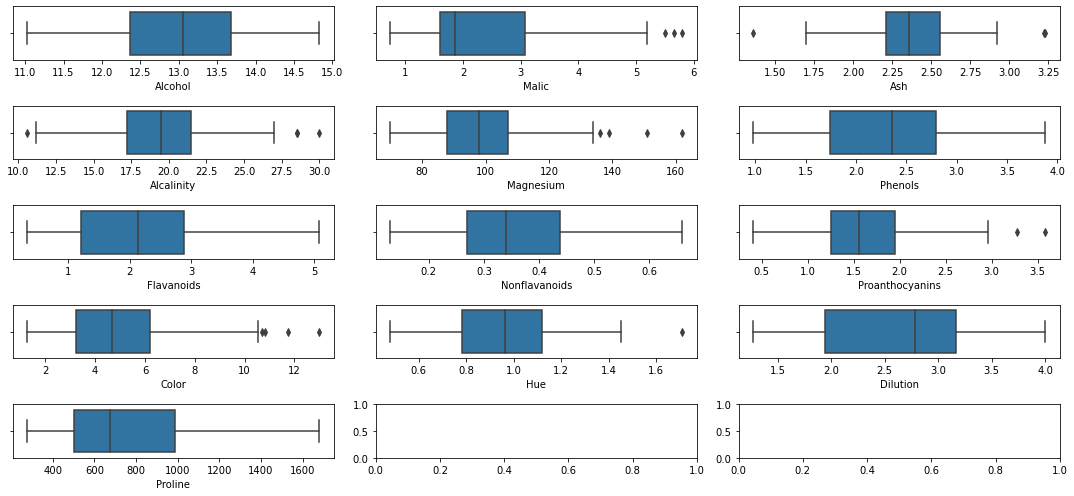

In [6]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.boxplot(wine_data.Alcohol,ax=ax[0,0])
sns.boxplot(wine_data.Malic,ax=ax[0,1])
sns.boxplot(wine_data.Ash,ax=ax[0,2])
sns.boxplot(wine_data.Alcalinity,ax=ax[1,0])
sns.boxplot(wine_data.Magnesium,ax=ax[1,1])
sns.boxplot(wine_data.Phenols,ax=ax[1,2])
sns.boxplot(wine_data.Flavanoids,ax=ax[2,0])
sns.boxplot(wine_data.Nonflavanoids,ax=ax[2,1])
sns.boxplot(wine_data.Proanthocyanins,ax=ax[2,2])
sns.boxplot(wine_data.Color,ax=ax[3,0])
sns.boxplot(wine_data.Hue,ax=ax[3,1])
sns.boxplot(wine_data.Dilution,ax=ax[3,2])
sns.boxplot(wine_data.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

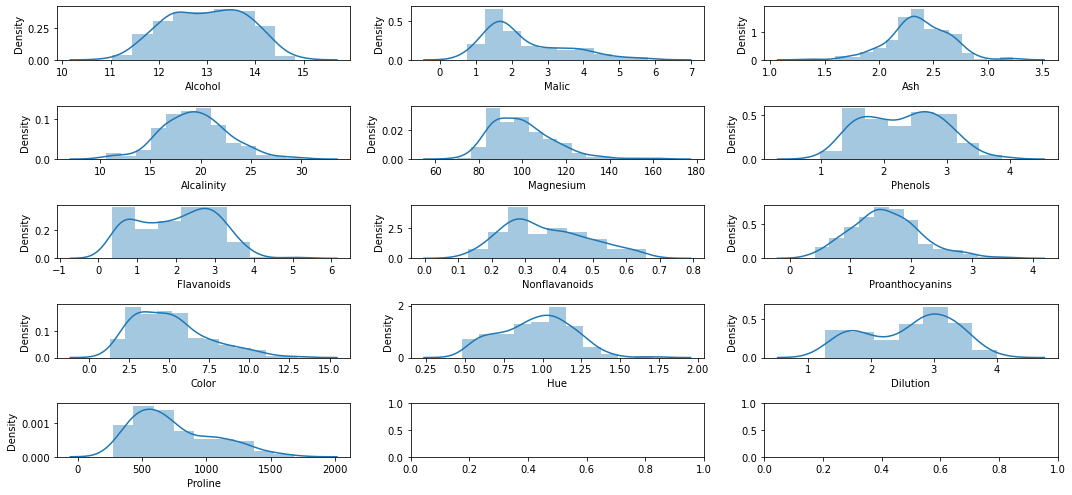

In [7]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.distplot(wine_data.Alcohol,ax=ax[0,0])
sns.distplot(wine_data.Malic,ax=ax[0,1])
sns.distplot(wine_data.Ash,ax=ax[0,2])
sns.distplot(wine_data.Alcalinity,ax=ax[1,0])
sns.distplot(wine_data.Magnesium,ax=ax[1,1])
sns.distplot(wine_data.Phenols,ax=ax[1,2])
sns.distplot(wine_data.Flavanoids,ax=ax[2,0])
sns.distplot(wine_data.Nonflavanoids,ax=ax[2,1])
sns.distplot(wine_data.Proanthocyanins,ax=ax[2,2])
sns.distplot(wine_data.Color,ax=ax[3,0])
sns.distplot(wine_data.Hue,ax=ax[3,1])
sns.distplot(wine_data.Dilution,ax=ax[3,2])
sns.distplot(wine_data.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

In [8]:
Wine_Data=wine_data.iloc[:,1:]

In [9]:
data_values=Wine_Data.values
data_values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
norm_data=scale(data_values)
norm_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Heirarchial clustering

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

Text(0.5, 1.0, 'dendrogram')

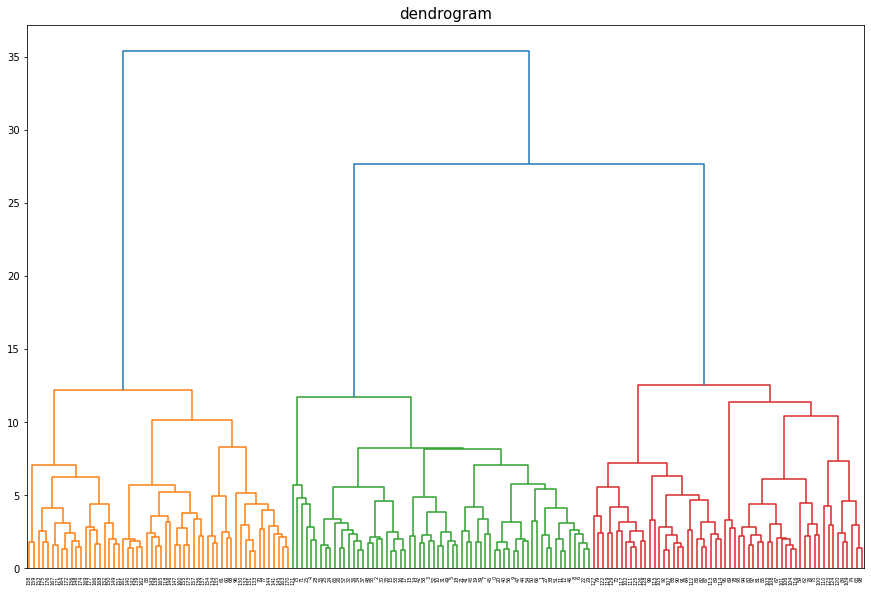

In [12]:
fig=plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='ward'))
plt.title('dendrogram',size=15)

In [13]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(norm_data) 

In [14]:
hc1 = h_complete.fit_predict(norm_data)

In [15]:
S1_norm=metrics.silhouette_score(norm_data,hc1)
S1_norm

0.20378689690677748

# Kmeans Clustering

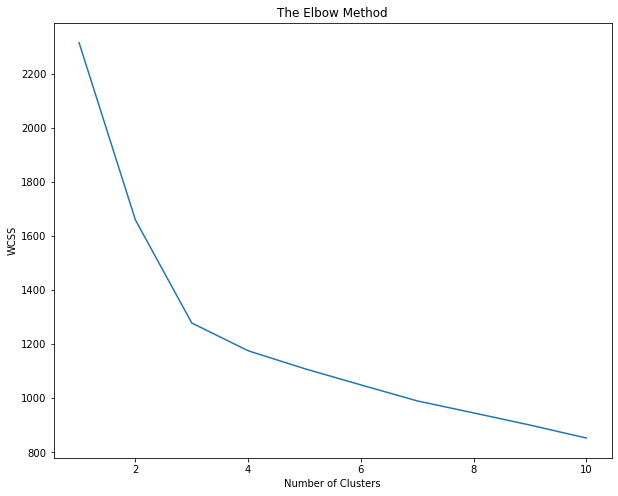

In [16]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(norm_data)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [17]:
Clf = KMeans(n_clusters=3)
y_Kmeans = Clf.fit_predict(norm_data) 

In [18]:
y_Kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
Clf.cluster_centers_ 

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [20]:
S1_norm=metrics.silhouette_score(norm_data,y_Kmeans)
S1_norm

0.2848589191898987

# PCA

In [21]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(norm_data)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [22]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [23]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [24]:
var1 = np.cumsum(np.round(var,decimals = 3)*100)
var1

array([36.2, 55.4, 66.5, 73.6, 80.2, 85.1, 89.3, 92. , 94.2, 96.1, 97.8,
       99.1, 99.9])

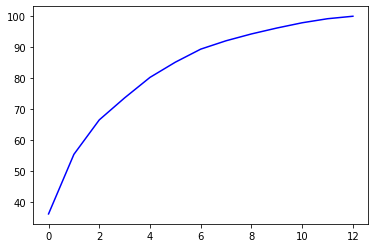

In [25]:
plt.plot(var1,color='blue')

In [26]:
 pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [27]:
data=pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])
data

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Kmeans clustering

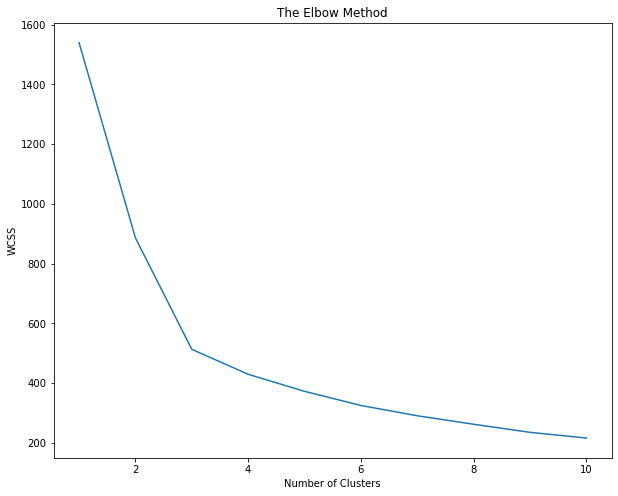

In [28]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data)
    WCSS.append(clf.inertia_) 
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [29]:
WCSS

[1539.503480188306,
 886.1611364823497,
 513.0564645910769,
 429.5747407332024,
 372.4909538782538,
 325.2059258819393,
 290.7330420670176,
 262.3447993722494,
 235.21206759237026,
 216.18312409125733]

In [30]:
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(data) 

In [31]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [32]:
clf.cluster_centers_ 

array([[ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [33]:
S1_pca=metrics.silhouette_score(data,y_kmeans)
S1_pca

0.453235121568395

# Heirarchial clustering

Text(0.5, 1.0, 'dendrogram')

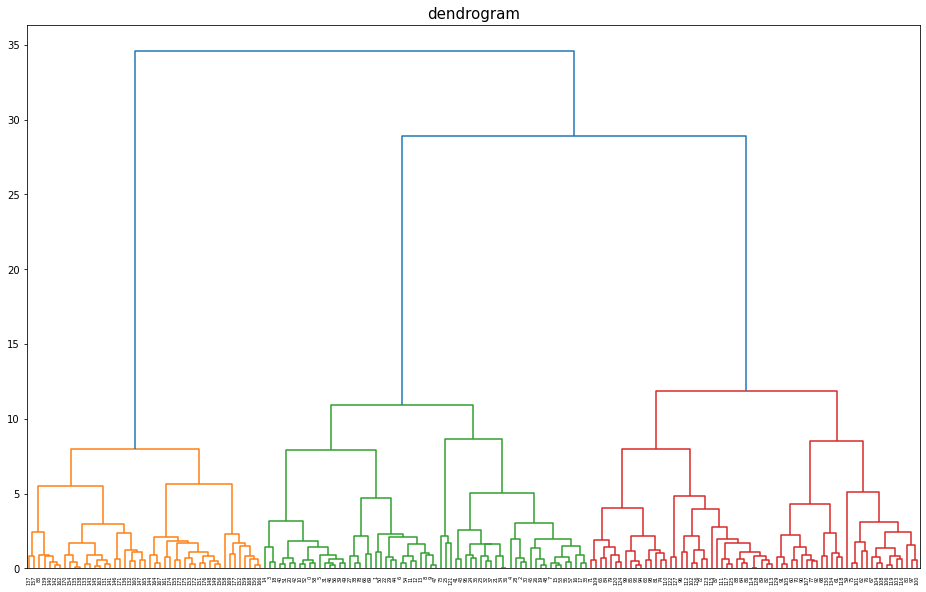

In [34]:
fig=plt.figure(figsize=(16,10))
dendrogram1=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title("dendrogram",size=15)

In [35]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(data) 

In [36]:
hc_1 = h_complete.fit_predict(data)
Clusters=pd.DataFrame(hc_1,columns=['Clusters'])

In [37]:
wine_data['Clusters']=hc_1

In [38]:
for i in range(3):
    print("Clusters", i)
    print("Total Members:", len(list(wine_data[wine_data['Clusters'] == i]['Type'].values)))
    print()

Clusters 0
Total Members: 106

Clusters 1
Total Members: 50

Clusters 2
Total Members: 22



In [39]:
S2_pca=metrics.silhouette_score(data,hc_1)
S2_pca

0.2875008935160636

In [40]:
wine_data.iloc[:,1:14].groupby(wine_data.Clusters).mean() 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters,,,,,,,,,,,,,
0,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


After applying pca, we have obtained same number of clusters as the original data